In [14]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [15]:
# Import csv
stores = pd.DataFrame(pd.read_csv(r'C:\Users\borum\Desktop\Woolworths Data Science Challenge\winapps_challenge-master\stores.csv'))
stores.head()

,Store,Date,IsHoliday,Weekly_Sales,Size,Temperature,Fuel_Price,Unemployment,CPI,Average_earning,Population,Population_over_65,Population_under_18
0,1,12/02/2010,True,1641957.44,151315,3.616667,2.548,8.106,211.242170,63840,18191,4779,2170
1,1,19/02/2010,False,1611968.17,151315,4.405556,2.514,8.106,211.289143,63909,18086,4719,2190
2,1,26/02/2010,False,1409727.59,151315,8.127778,2.561,8.106,211.319643,63897,18153,4762,2169
3,1,12/03/2010,False,1439541.59,151315,14.327778,2.667,8.106,211.380643,63465,18308,4695,2181
4,1,19/03/2010,False,1472515.79,151315,12.544444,2.720,8.106,211.215635,63808,18299,4707,2182


In [16]:
# Understanding the data
stores.shape

(4545, 13)

In [17]:
stores.describe()

,Store,Weekly_Sales,Size,Temperature,Fuel_Price,Unemployment,CPI,Average_earning,Population,Population_over_65,Population_under_18
count,4545.000000,4.545000e+03,4545.00000,4545.000000,4545.000000,4545.000000,4545.000000,4545.000000,4545.000000,4545.000000,4545.000000
mean,23.000000,1.041361e+06,130287.60000,15.912567,3.365705,7.994832,171.627002,59143.086469,13917.783938,3802.679868,1777.778658
std,12.988602,5.674444e+05,63119.06225,10.179806,0.459282,1.876028,39.381399,3286.820523,6351.960693,1758.848366,826.623486
min,1.000000,2.135383e+05,34875.00000,-14.700000,2.472000,3.879000,126.064000,52960.000000,4252.000000,1229.000000,540.000000
25%,12.000000,5.473849e+05,70713.00000,8.794444,2.936000,6.891000,131.784000,56544.000000,8395.000000,2199.000000,1148.000000
50%,23.000000,9.542202e+05,126512.00000,17.011111,3.459000,7.874000,182.622509,59002.000000,12200.000000,3474.000000,1721.000000
75%,34.000000,1.404430e+06,202307.00000,23.805556,3.742000,8.622000,212.833640,61875.000000,18601.000000,4760.000000,2295.000000
max,45.000000,3.818686e+06,219622.00000,37.855556,4.468000,14.313000,227.232807,65512.000000,28927.000000,7982.000000,3807.000000


<AxesSubplot:>

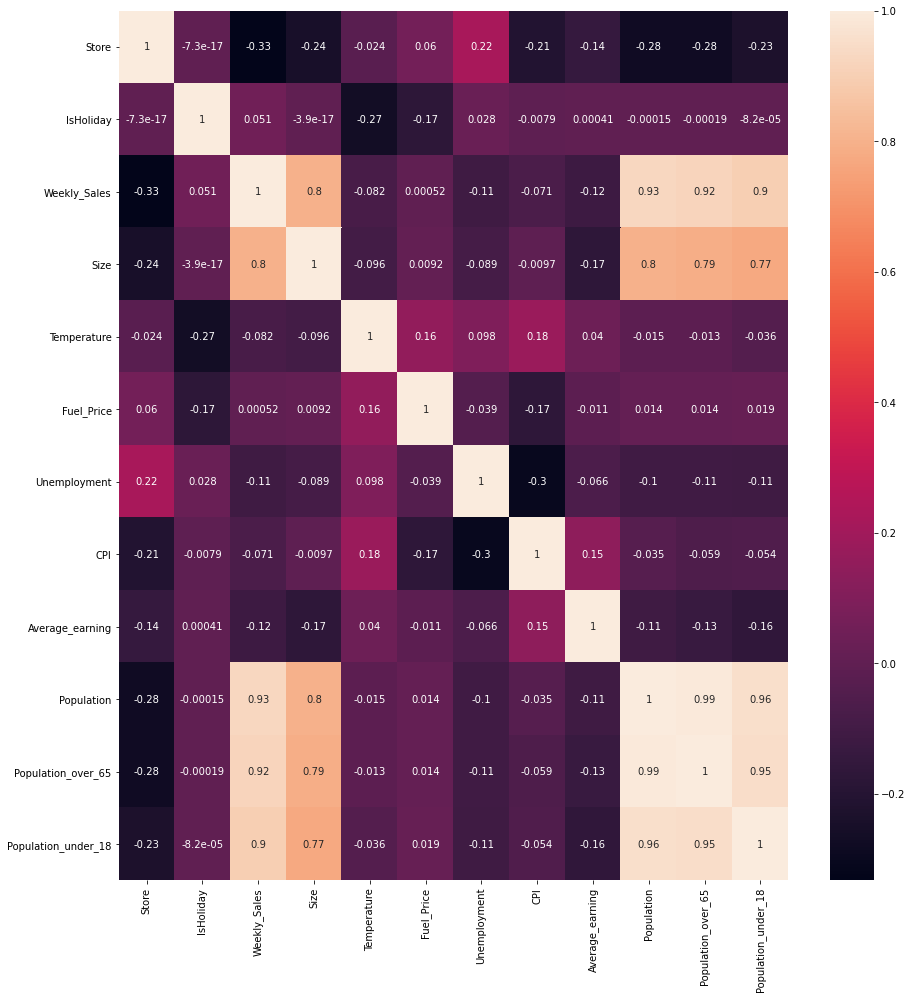

In [31]:
# Building the correlation matrix to visualise the data
plt.figure(figsize=(15, 16))
sns.heatmap(stores.corr(), annot = True)

In [19]:
# From this we can see the correlation between Weekly_Sales and the other variables

In [82]:
X = stores.loc[:, ['Size', 'Population', 'Population_over_65', 'Population_under_18'] ].values
y = stores.loc[:, ['Weekly_Sales']]

In [83]:
# Splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2, random_state = 0)

In [84]:
# Fitting the multiple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [85]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([[1504994.10049322],
       [1330843.77037707],
       [ 557643.47121132],
       ...,
       [1850697.24808761],
       [1308821.30936266],
       [1001884.16559664]])

In [86]:
# Coefficients
print(regressor.coef_)

[[  1.75276154  53.14178153   1.26246025 124.80813876]]


In [87]:
# Intercept
print(regressor.intercept_)

[-147589.4793444]


In [88]:
# R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8775335249240365